# Introduction to Chapter 4 -- Training Models
in past chapters we treated the models as black boxes. \
in this chapter we will take more deep look on algorithms and will be essential for part 2 of the book \
__Table of Contents:__
* Linear Regression Model
    * Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set
    * Using an iterative optimization approach "Gradient Descent" we will look on few types (Batch GD, Mini-batch GD, and Stochastic GD)
* Polynomial Regression (that can fit nonlinear Dataset)
* Learning Curves
* Regularization Techinques
* Logistic Regression
* Softmax Regression

# Linear Regression
let 
$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$
where 
- $\hat{y}$ is the predicted value 
- $n$ is number of features
- $x_i$ is the ith featue
- $\theta_0 ... \theta_n$ is the model parameters
    - $\theta_0$ is the bias term or intercerpet
    - $\theta_1 .. \theta_n$ is the feture weights
    
we can vectorize it by let $\mathbf{x}$ be  vector of $[x_0, x_1, ..., x_n]$ and $\bf{\theta}$ be column vector of $[\theta_0,...\theta_n]$

$$
  \hat{y} = h_{\theta}(\bf{x}) = \bf{\theta^T.x}  \
$$
$h_{\theta}$ is the hypothesis function, using the model parameters $\bf{\theta}$


<div class="alert alert-block alert-warning">Note: in Machine Learning typically vectors consider columns, but to not switch to much will use row</div>



## Training Linear Regression (Closed Form Algorithms)

### Closed Form Derivation

We need to have cost function or something we need to optimize, we know that `RMSE` is best estimate of `Linear Regreesion` model so we need $\bf{W}$ or $\bf{\theta}$ to minimize `RMSE` or `MSE` as it's easy and don't matter
$$
    \text{MSE}(\mathbf{X}, h_{\theta}) = \frac{1}{m} \sum_{i=0}^{m}(\mathbf{\theta^T.x^{(i)}} - y^{(i)})^2
$$
one solution is the closed form
$$
    \mathbf{w} = (\mathbf{XX^T})^{-1}\mathbf{X}y^T
$$
where $\mathbf{X} = [\mathbf{x_1, x_2, ... x_m}]$ and same with $\mathbf{y}$ 

so when solve `MSE`

$$
    \text{MSE}(\bf{X}, h_{\theta}) = \frac{1}{m} \sum_{i=0}^{m}(((\bf{XX^T})^{-1}\bf{X}y^T)^T\bf{.x^{(i)}} - y^{(i)})^2\\=\frac{1}{m} \sum_{i=0}^{m}((\bf{X^{T^{-1}}X^{-1}}\bf{X}y^T)^T\bf{.x^{(i)}} - y^{(i)})^2\\=\frac{1}{m} \sum_{i=0}^{m}(y.X^{-1})\bf{.x^{(i)}} - y^{(i)})^2
$$

#### Why we use MSE

#### Assumption

<img src="./img/linreg.png" />

let $ y_i = \bf{w}^T \bf{x_i} + \epsilon_i$ where $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$

$\implies y_i | \mathbf{x_i} \sim \mathcal{N}(\mathbf {w^Tx_i}, \sigma^2) \implies P(y_i|\mathbf{x_i}, \mathbf{w}) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-1}{2}(\frac{\mathbf{w^T x_i} - y_i}{\sigma})^2}$


In words, we assume that the data is drawn from a "line" $w^⊤x$ through the origin (one can always add a bias / offset through an additional dimension). For each data point with features $x_i$, the label $y$ is drawn from a Gaussian with mean $w^⊤ x_i$ and variance $\sigma^2$. Our task is to estimate the slope $\mathbf{w}$ from the data.
#### Derivation of MSE
<img src="./img/estimating_with_mle.png" />

### Implementation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y')

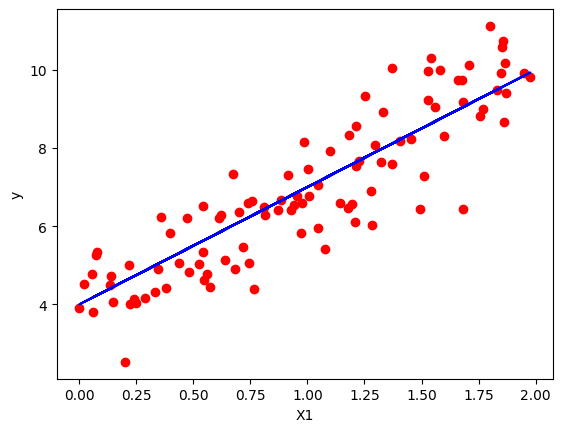

In [4]:
# let's look on the code now
X = 2 * np.random.rand(100, 1) # note here the book used mxn so we inverse transpose
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, 'ro')
plt.plot(X, 4 + 3*X, 'b-')
plt.xlabel('X1')
plt.ylabel('y')

$$
    \mathbf{w} = (\mathbf{XX^T})^{-1}\mathbf{X}y^T
$$

In [5]:
# y = 4 + 3 X + random_noise normally distributed
X_b = np.c_[np.ones((100, 1)), X] # add ones for all examples since its X is transpose
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[3.74542041],
       [3.18102444]])

In [6]:
X_new = np.array([[0], [2]]) # eg., X_test
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[ 3.74542041],
       [10.10746929]])

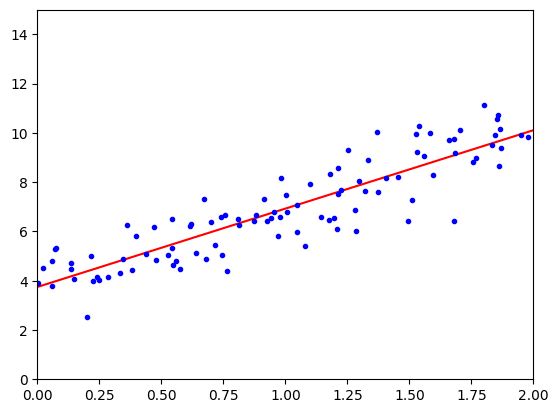

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# let make it use sklearn
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression().fit(X, y)

In [10]:
lin_reg.coef_, lin_reg.intercept_ #approx 3, 4

(array([[3.18102444]]), array([3.74542041]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.74542041],
       [10.10746929]])

### SVD Approach 


#### Pseudoinverse
$$
    \hat{\theta} = \mathbf{X^{+}}.y
$$

The pseudoinverse itself is computed using a standard matrix factorization technique  ___Singular Value Decomposition (SVD)___ that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of 3 matrices $\mathbf{U Σ V^⊺}$ 

The pseudoinverse is computed as $\mathbf{X^{+}} = \mathbf{V Σ^+ U^⊺}$

to compute $\mathbf{Σ^+}$ 
1. set to zero all value that less than $\epsilon$
2. replace all non-zero values to their inverse
3. transpose resulting matrix

>This approach is more efficient than computing the Normal
Equation, plus it handles edge cases nicely: indeed, the Normal Equation
may not work if the matrix X X is not invertible (i.e., singular), such as if m
< n or if some features are redundant, but the pseudoinverse is always
defined.


In [12]:
theta_bst_ = np.linalg.pinv(X_b) @ y
theta_bst_

array([[3.74542041],
       [3.18102444]])

In [13]:
# let's use scipy (in numpy)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.74542041],
       [3.18102444]])

### Time Complexity of Above Algorithms

#### Training Complexity

- __Normal Equation:__
    - it compute $(\mathbf{X.X^T})^{-1}$ where $\mathbf{X.X^T}$ is matrix of size _(n+1)x(n+1)
    - which is typically about $\mathcal{O}(n^{2.4})$ to $\mathcal{O}(n^{3})$
- __SVD Approach:__
    - The SVD approach used by _Scikit-Learn’s LinearRegression_ class is about $\mathcal{O}(n^2)$
 

<div class="alert alert-block alert-danger">Both approaches are very bad at with large number of Features  (e.g., 100,000)</div>

<div class="alert alert-block alert-success">On the positive side, both are linear with regard to
the number of instances in the training set (they are O(m)), <br/> so they handle large training
sets efficiently, provided they can fit in memory.</div>


#### Predication Complexity (PRO)
Once you trained model and want to predict, The computatinally complexity is linear regard the number of features or new samples.

## Gradient Descent 

### Defination

is generic optimization algorithm by taking small steps in order to minimize a cost function.

>Suppose you are lost in the mountains in a dense fog, and you can only feel
the slope of the ground below your feet. A good strategy to get to the bottom
of the valley quickly is to go downhill in the direction of ___the steepest slope___.

__steps:__
1. initialize $\theta$ with random values
2. improve it gradually, taking one step in direction that decrease cost (eg., $MSE$)
3. keep until algorithm converge

<img width="500px" src="./img/gradient_descent1.png"/>

### Take Care in Gradient


__Learning Rate__
An __important hyperparameter__ to GD (meaning size of step each time it take)

1. if it's small it will take many steps
   <img width="500px" src="./img/gradient_descent2.png"/>

3. if it's large it's risking overshooting, you may cross vally and go higher and never reach global minimum
    <img width="500px" src="./img/gradient_descent3.png"/>

4. not all cost functions are convex _(if you pick any two points on the
curve, the line segment joining them never crosses the curve)_ with __no local minimum__

    There may be holes, ridges, plateaus, and all sorts of irregular terrains, making
    convergence to the minimum difficult
    
    there's two challenges causes by this:

   
        a. (left) it will converge to a local minimum, which is not as good as the global minimum. 
        b. (right)  it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum
   <img width="500px" src="./img/gradient_descent4.png"/>

___MSE Function___
Fortunately, the _MSE_ is convex function. it's deriviative also continouse with a slope that never changes abruptly(surprisly).

this mean it will guranttee to find solution close to the global minimum (if it gives enough time & not to large learning rate $\alpha$)

even ___MSE___ is in bowl shape BUT it can be elongated bowl (مسطح كدا) if features have different scales


4. __Different Feature Scale__
   
    * As you can see, on the left the Gradient Descent algorithm goes straight
    toward the minimum, thereby reaching it quickly,

    * As on the right it first goes in a direction almost orthogonal to the direction of the global
    minimum, and it ends with a long march down an almost flat valley. It will
    eventually reach the minimum, but it will take a long time
   <img width="1000px" src="./img/gradient_descent5.png"/>
    <div class="alert alert-block alert-warning">Note: you must always ensure all parameters have the same scale, or else it will take long time to converge </div>
5. __Higher Dimension Higher Complexity__
    * training a model means searching
for a combination of model parameters that minimizes a cost function (over
the training set).
    *  It is a search in the model’s parameter space
    *  the more parameters => the more dimensions this space => the harder
the search is

    > searching for a needle in a 300-dimensional haystack is much trickier than in 3 dimensions.
    > 
    > Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl

## Batch Gradient Descent (let's start training)

### Calculate Gradients


<img width="500px" src="./img/gradient_eq.png" />

<div class="alert alert-block alert-warning">Note: at each Gradient Descent it involve calculation on whole dataset this why it's called <b>Batch Gradient</b></div>


<div class="alert alert-block alert-warning">Note: As a result it is terribly <b>slow</b> on very large training
sets However, Gradient Descent scales well with the number of features;</div>

<div class="alert alert-block alert-info">Info: training a Linear Regression
model when there are hundreds of thousands of features is much faster using Gradient
Descent than using the Normal Equation or SVD decomposition</div>


__Update STEP:__
where eta is learning rate
$$
\theta_{new} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta)
$$

### Implementation

In [14]:
X_b.shape, y.shape

((100, 2), (100, 1))

In [15]:
def calc_batch_grad(X_b, y, eta=0.1, n_iterations = 1000):
    thetas = [np.random.randn(2,1)]
    m = X_b.shape[0]
    for i in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ thetas[i] - y)
        theta = thetas[i] - eta * gradients
        thetas.append(theta)
    return thetas

In [16]:
etas = [0.02, 0.1, 0.5]

thetas = [calc_batch_grad(X_b, y, e) for e in etas]


In [17]:
thetas = np.array(thetas)
thetas.shape

(3, 1001, 2, 1)

[[3.74514818]
 [3.18126018]]
[[3.74542041]
 [3.18102444]]
[[-3.86180614e+56]
 [-4.45949951e+56]]


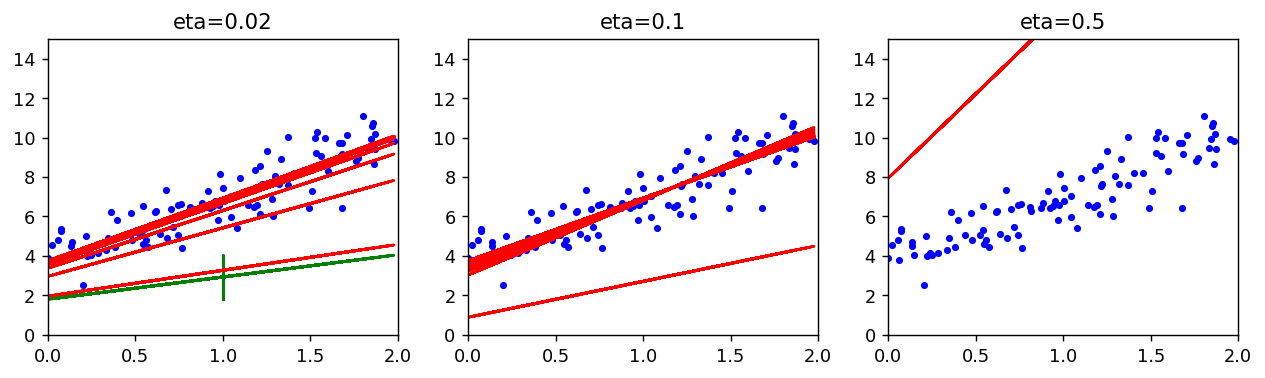

In [18]:
plt.figure(figsize=(12, 3), dpi=128)
for plot_i, thetas_plt in enumerate(thetas):
    plt.subplot(1, 3, plot_i + 1)
    plt.plot(X, y, 'b.')
    plt.plot(X_b, X_b @ thetas_plt[0], 'g-', label="start")
    print(thetas_plt[-1])
    for theta_line in thetas_plt[1::10]:
        plt.plot(X, X_b @ theta_line, 'r-')
        
    plt.title(f"eta={etas[plot_i]}")
    plt.axis([0, 2, 0, 15])
    
        
    

### Tips for Hyperparameter Tunning

__TIP to choose learning rate__:
- you can use Grid Search to find good learning rate
- but you need to limit number of iterations to eliminate models that take so long to converge

__TIP to choose number of iterations__:
- between low (far away from optimial solution) and high (take so long) 
- solution to set large number of iterations & tolerance $\epsilon$ (stop when gradient vector become tiny)

__Convergance Rate__:
- When the cost function is convex and its slope does not change abruptly (eg., _MSE_)
- Batch Gradient Descent with a fixed $\eta$ will eventually converge to the optimal solution
- but you may have to wait a while: $\approx \mathcal{O}(1/\epsilon)$  iterations to reach the
optimum within a range of ϵ
- depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer

## Stochastic Gradient Descent

### Properties

1. main problem with Batch Gradient Descent => it uses whole training set to compute gradients every time
2. Stochastic is the completely oposite => it choose __ONE__ random sample every time to compute gradients
3. __PRO__ much faster, possible to run on huge training sets
4. called ___out-of-core___ (online learning that used for memory fit problems)
5. __CON__ due it stochastic(_random_) nature => much less regular than Batch Gradient Descent
    * cost will bounce up and down -> on average decreasing
    * over time will end up very ___close___ to the _minimum__
    * **BUT** will never reach it will just keep _bouncing_ around it
    * solution is __GOOD__ but not __Optimal__
      
    <img width="400px" src="./img/stochastic1.png" />

 __Randomness of Stochastic:__
1. __PRO__ for irregular cost function, randomness will help to jump out from local minimum => __SGD have better chance__ of finding global minimum than __BGD__
2. __CON__  it means that the algorithm can never settle at the minimum
3. __One Solution__  this dilemma is to gradually reduce the learning rate.
    *  The steps start out large -> (which helps make quick progress and escape local minima)
    *  Then get smaller and smaller -> allowing the algorithm to settle at the global minimum
    *  function determine learning rate called ___Learning Schedule___

__Learning Schedule:__
* if $\eta$ reduced too <u>Quickly</u> you may -> get stuck to local minimum | frozen up halfway to global minimum
* if $\eta$ reduced too <u>Slowly</u> you may -> jump around the minimum for long time & end up with supoptimal solution if you halt training too early.


### Implementation (Simple Learning Schedule)

> The number of epochs is considered a hyperparameter. It defines the number of times the entire data set has to be worked through the learning algorithm.

> By convention we iterate by rounds of m iterations; each round is called an
___epoch___

In [21]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
m = 100
def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2,1) # random initialization
thetas_update = [theta]
for epoch in range(n_epochs):
    for i in range(m):
        # get random sample
        random_index = np.random.randint(m) 
        xi, yi = X_b[[random_index]], y[[random_index]]
        
        gradients = 2 * xi.T @ (xi@theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        thetas_update.append(theta)
theta

array([[3.73328558],
       [3.1287693 ]])

__Notice__ it only need 50*m to reach good results of $\theta$ not like __BGD__ which need 1000 iteration on whole dataset

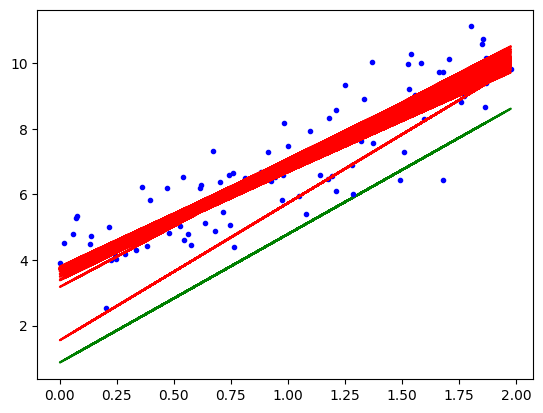

In [22]:
plt.plot(X, X_b @ thetas_update[0], "g-")
plt.plot(X, y, "b.")
for theta_ in thetas_update[1::50]:
    plt.plot(X, X_b @ theta_, "r-")
# plt.axis([0, 2, 0, 15])
plt.show()

<div class="alert alert-block alert-info"><b>Note:</b> that since instances are picked randomly, some instances may be pickedseveral times per epoch, while others may not be picked at all. <br/>If you want to be sure that the algorithm goes through every instance at each epoch, another
approach is to <b>shuffle the training set</b> (making sure to shuffle the input
features and the labels jointly), then go through it instance by instance, then
shuffle it again, and so on. <br/> <b>However, this approach generally converges more
slowly</b></div>


<div class="alert alert-block alert-warning"><b>Warning:</b> When using SGD, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the
global optimum, on average. A simple way to ensure this is to shuffle the instances
during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum</div>


In [23]:
from sklearn.linear_model import SGDRegressor

# it run unitl maximum 1,000 epochs || until the loss drops by less than 0.001
# penalty=None meanining no regularization
# eta is start of learning rate
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [24]:
# Once again, you find a solution quite close to the one returned by the Normal Equation
sgd_reg.coef_, sgd_reg.intercept_

(array([3.19404379]), array([3.74158999]))

## Mini-Batch Gradient Descent

### Properties

* computes the gradients on small random sets of instances called __mini-batches__
* Compared to ___SGD___:
    *  get a performance boost from hardware optimization using GPUs
    *  the parameter space is less erratic(irrergular) than with Stochastic GD _espicially with large mini-batches_
    *  As a result, Mini-batch GD will end up walking around a bit closer to the minimum than
Stochastic GD
    * but it may be harder for it to escape from local minima 

## Compare Algorithms

### Compare Gradients Paths

* Batch GD’s path actually stops at the minimum
*  Stochastic GD and Mini-batch GD continue to walk around
*  Batch GD takes a lot of time to take each step
*  __Don't Forget__ that Stochastic GD and Mini-batch GD would also reach the minimum if you
used a good learning schedule.
* Stochastic GD jump around more than Mini-Batch GD

<img src="./img/compareG.png" />

### Compare All

<img src="./img/compareAll.png" />

<div class="alert alert-block alert-success"><b>Note:</b>     
There is almost no difference after training: all these algorithms end up with very
similar models and make predictions in exactly the same way</div>
